### Import Libraries

In [17]:
import pandas as pd
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy

### Read data

In [18]:
df = pd.read_csv('ABC_2021.csv')

### EDA

In [19]:
df['GMT_AIR_DATE'] = pd.to_datetime(df['GMT_AIR_DATE'])
df['Year'] = df['GMT_AIR_DATE'].dt.year
df['Month'] = df['GMT_AIR_DATE'].dt.month
df['day'] = df['GMT_AIR_DATE'].dt.day
df['hour'] = df['GMT_AIR_DATE'].dt.hour
df['minute'] = df['GMT_AIR_DATE'].dt.minute
df['day_of_week'] = pd.Series(df['GMT_AIR_DATE']).dt.dayofweek
df['date'] = df['GMT_AIR_DATE'].dt.date
df['date'] = pd.to_datetime(df['date'])
df.set_index('GMT_AIR_DATE', inplace = True)
df['minutesfromstart'] = (df.index - df.index[0]).total_seconds()/60

<AxesSubplot:xlabel='AUDIENCE', ylabel='Density'>

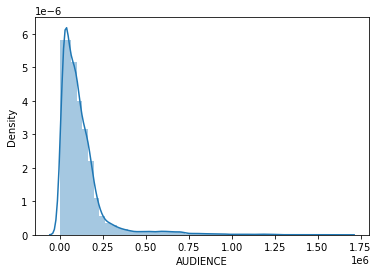

In [20]:
sns.distplot(df['AUDIENCE'])

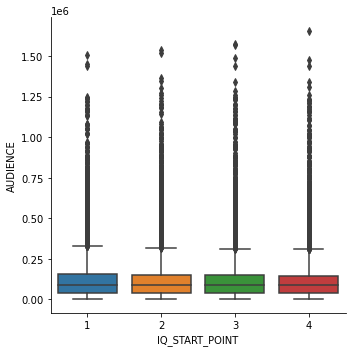

In [21]:
sns.catplot(x="IQ_START_POINT", y="AUDIENCE", data=df, kind='box')

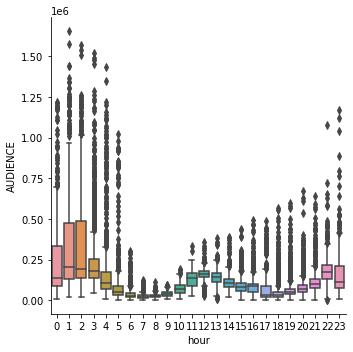

In [22]:
sns.catplot(x="hour", y="AUDIENCE", data=df, kind='box')

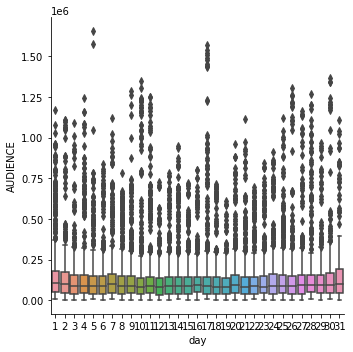

In [23]:
sns.catplot(x="day", y="AUDIENCE", data=df, kind='box')

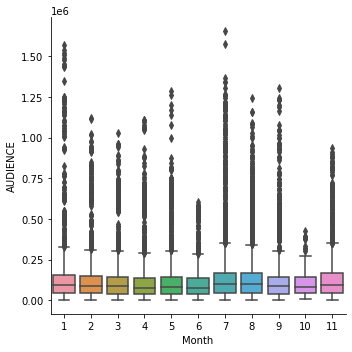

In [24]:
sns.catplot(x="Month", y="AUDIENCE", data=df, kind='box')

In [25]:
# input_df = pd.concat([dataframe1, dataframe2])
input_df = df.copy()
# input_df = input_df.reset_index()
input_df.drop(['date', 'minutesfromstart', 'IQ_START_POINT', 'DAYPARTID'], axis = 1, inplace = True)

In [26]:
x = input_df.drop('AUDIENCE', axis = 1)
y = input_df['AUDIENCE']

limit = 26000

X_train = x[:limit]
y_train = y[:limit]

X_test = x[limit:]
y_test = y[limit:]

X_train.drop(['Year'], axis = 1, inplace = True)
X_test.drop(['Year'], axis = 1, inplace = True)

In [27]:
regr = RandomForestRegressor(n_estimators = 100, max_depth=10, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred = pd.Series(y_pred)
y_pred.index = y_test.index

print('Train score:', regr.score(X_train,y_train))
print('Test score:', regr.score(X_test,y_test))

Train score: 0.8898976069004363
Test score: 0.5073649859733542


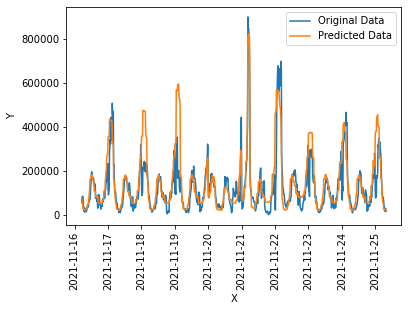

In [28]:
plt.plot(y_test, label='Original Data')
plt.plot(y_pred, label='Predicted Data')
plt.xticks(rotation='vertical')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()


In [33]:
from datetime import datetime, timedelta

def generate_datetime_list(start_datetime, end_datetime):
    datetime_list = []
    current_datetime = start_datetime
    while current_datetime <= end_datetime:
        datetime_list.append(current_datetime)
        current_datetime += timedelta(minutes=15)
    return datetime_list

# Example usage
start_datetime = datetime(2021, 11, 25, 12, 0)  # Start date and time
end_datetime = datetime(2021, 12, 10, 23, 45)  # End date and time
datetimes = generate_datetime_list(start_datetime, end_datetime)

In [34]:
df_pred = pd.DataFrame(datetimes, columns = ['Date'])
df_pred['Date'] = pd.to_datetime(df_pred['Date'])
df_pred['Year'] = df_pred['Date'].dt.year
df_pred['Month'] = df_pred['Date'].dt.month
df_pred['day'] = df_pred['Date'].dt.day
df_pred['hour'] = df_pred['Date'].dt.hour
df_pred['minute'] = df_pred['Date'].dt.minute
df_pred['day_of_week'] = pd.Series(df_pred['Date']).dt.dayofweek
df_pred['date'] = df_pred['Date'].dt.date
df_pred['date'] = pd.to_datetime(df_pred['date'])
df_pred.set_index('Date', inplace = True)
# df_pred['minutesfromstart'] = (df_pred.index - df_pred.index[0]).total_seconds()/60
df_pred = df_pred.drop(['Year', 'date'], axis = 1)

In [35]:
y_pred_future = regr.predict(df_pred)
y_pred_future = pd.Series(y_pred_future)
y_pred_future.index = df_pred.index

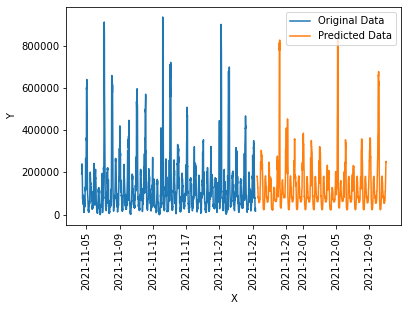

In [36]:
plt.plot(pd.concat([y_train, y_test]).tail(2000), label='Original Data')
plt.plot(y_pred_future, label='Predicted Data')
plt.xticks(rotation='vertical')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()